In [1]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
ans=[None]*5

In [ ]:
#Download Dataset from https://www.kaggle.com/uciml/zoo-animal-classification

In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/uciml/zoo-animal-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedfayiz
Your Kaggle Key: ··········


100%|██████████| 1.85k/1.85k [00:00<00:00, 1.35MB/s]

In [ ]:
!pip install opendatasets


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import the dataset and define the feature as well as the target datasets / columns 
import pandas as pd
data=pd.read_csv("/content/zoo-animal-classification/zoo.csv")
print(data.shape)
print(data.head())
print(data.columns) 
#We drop the animal names since this is not a good feature to split the data on  
...
...

FileNotFoundError: [Errno 2] No such file or directory: '/content/zoo-animal-classification/zoo.csv'

In [8]:
data.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3])

In [9]:
#Write a function to find the entropy on a split "target_col"
import math
target_col=list(data["class_type"])
def entropy(target_col):
    c=[None]*7
    c[0],c[1],c[2],c[3],c[4],c[5],c[6]=target_col.count(1),target_col.count(2),target_col.count(3),target_col.count(4),target_col.count(5),target_col.count(6),target_col.count(7)
    entropy=0
    for i in range(7):
        p=c[i]/101
        entropy=entropy-p*math.log(p,len(list(data["class_type"].unique())))
    return entropy
print(entropy(target_col))
e_0=entropy(target_col)
...
...
...

0.8515345400438068


Ellipsis

In [10]:
list(data.columns)

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [11]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']
ent={}
def entropy_f(data):
    for i in list(data.columns):
        ent[i]=0
        for j in list(data[i].unique()):
            p=list(data[i]).count(j)/101
            ent[i]=ent[i]-p*math.log(p,len(list(data[i].unique())))

entropy_f(data)
print(ent)
            

{'animal_name': 0.9991801918847448, 'hair': 0.9840304711717017, 'feathers': 0.7179499765002912, 'eggs': 0.9794662187017299, 'milk': 0.9743197211096903, 'airborne': 0.7910662980902585, 'aquatic': 0.9396846718728563, 'predator': 0.9914266810680207, 'toothed': 0.9685867165455516, 'backbone': 0.6761627418829198, 'breathes': 0.7374895672137456, 'venomous': 0.3993820824245975, 'fins': 0.653839880626333, 'legs': 0.7867856278366623, 'tail': 0.8228368841492257, 'domestic': 0.5538976334852962, 'catsize': 0.9880162151534646, 'class_type': 0.8515345400438068}


In [12]:
#Find the entropy of the feature "toothed"
a=ent["toothed"]
ans[0]=a

In [13]:
ans[0]

0.9685867165455516

In [14]:
from collections import Counter
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class_type"):       
    #Calculate the entropy of the total dataset  
    e=0
    for i in  list(data[target_name].unique()):
        p=list(data[target_name]).count(i)/101
        e=e-p*math.log(p,2)
        
    ...
    #Calculate the values and the corresponding counts for the split attribute
    dic={}
    x=zip(list(data[split_attribute_name]),list(data[target_name]))
    my_count=Counter(list(x))
    l=[]
    #get counts of each split in split attribute:
    for i in list(data[split_attribute_name].unique()):
        l.append((i,list(data[split_attribute_name]).count(i)/101))
    l=dict(l)
        
            
            
            
        
        
    ... 
    #Calculate the weighted entropy  
    weighted=0
    for i in list(data[split_attribute_name].unique()):
        entropy=0
        for j in list(data[target_name].unique()):
            p=my_count[(i,j)]/(l[i]*101)
            if(p):
                entropy=entropy-p*math.log(p,2)
        weighted=weighted+l[i]*entropy
        
        
    
    ...
    #Calculate the information gain  
    gain=e-weighted
    return gain
    ...
    ...
InfoGain(data,'breathes')

0.6144940279390552

In [15]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
a=InfoGain(data,"hair","milk")
...
ans[1]=a

In [16]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
for i in feature_names:
    a=InfoGain(data,"milk",i)
    print("Info gain between milk and",i,"is",a)
    
...

Info gain between milk and hair is 0.6599660577558697
Info gain between milk and feathers is 0.17242769884415887
Info gain between milk and eggs is 0.7870598185734243
Info gain between milk and milk is 0.9743197211096903
Info gain between milk and airborne is 0.11370352314621823
Info gain between milk and aquatic is 0.10181386403185955
Info gain between milk and predator is 0.000636777244021336
Info gain between milk and toothed is 0.3465412540071715
Info gain between milk and backbone is 0.15262359382508262
Info gain between milk and breathes is 0.18259765312929555
Info gain between milk and venomous is 0.06284178150207947
Info gain between milk and fins is 0.018672543666944375
Info gain between milk and legs is 0.36709133269262484
Info gain between milk and tail is 0.03350320459269063
Info gain between milk and domestic is 0.01901013577509325
Info gain between milk and catsize is 0.2509271768405701


Ellipsis

In [17]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
#Split the given data into 80 percent training data and 20 percent testing data
from sklearn.model_selection import train_test_split
x=data[feature_names]
y=data.class_type
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


...
...
...

Ellipsis

In [18]:
#Fit the given data
model=DecisionTreeClassifier(criterion = 'entropy')
model=model.fit(x_train,y_train)
...

Ellipsis

In [19]:
#Make a prediction on the test data and return the percentage of accuracy
pred=model.predict(x_test)
from sklearn. metrics import accuracy_score
acc=accuracy_score(y_test,pred)
...
...
ans[2]=accuracy_score(y_test,pred)
accuracy_score(y_test,pred)

0.9523809523809523

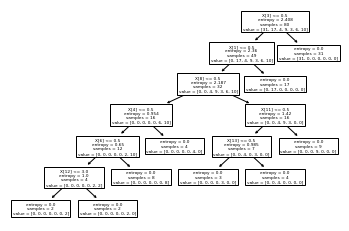

In [20]:
from sklearn import tree
tree=tree.plot_tree(model)

In [21]:
from sklearn.tree import export_text
r = export_text(model, feature_names=feature_names)
print(r)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- backbone <= 0.50
|   |   |   |--- airborne <= 0.50
|   |   |   |   |--- predator <= 0.50
|   |   |   |   |   |--- legs <= 3.00
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- legs >  3.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- predator >  0.50
|   |   |   |   |   |--- class: 7
|   |   |   |--- airborne >  0.50
|   |   |   |   |--- class: 6
|   |   |--- backbone >  0.50
|   |   |   |--- fins <= 0.50
|   |   |   |   |--- tail <= 0.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- tail >  0.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- fins >  0.50
|   |   |   |   |--- class: 4
|   |--- feathers >  0.50
|   |   |--- class: 2
|--- milk >  0.50
|   |--- class: 1



In [22]:
#Run this cell to visualize the decision tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

dot_data = StringIO()
x=tree.export_graphviz(model, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

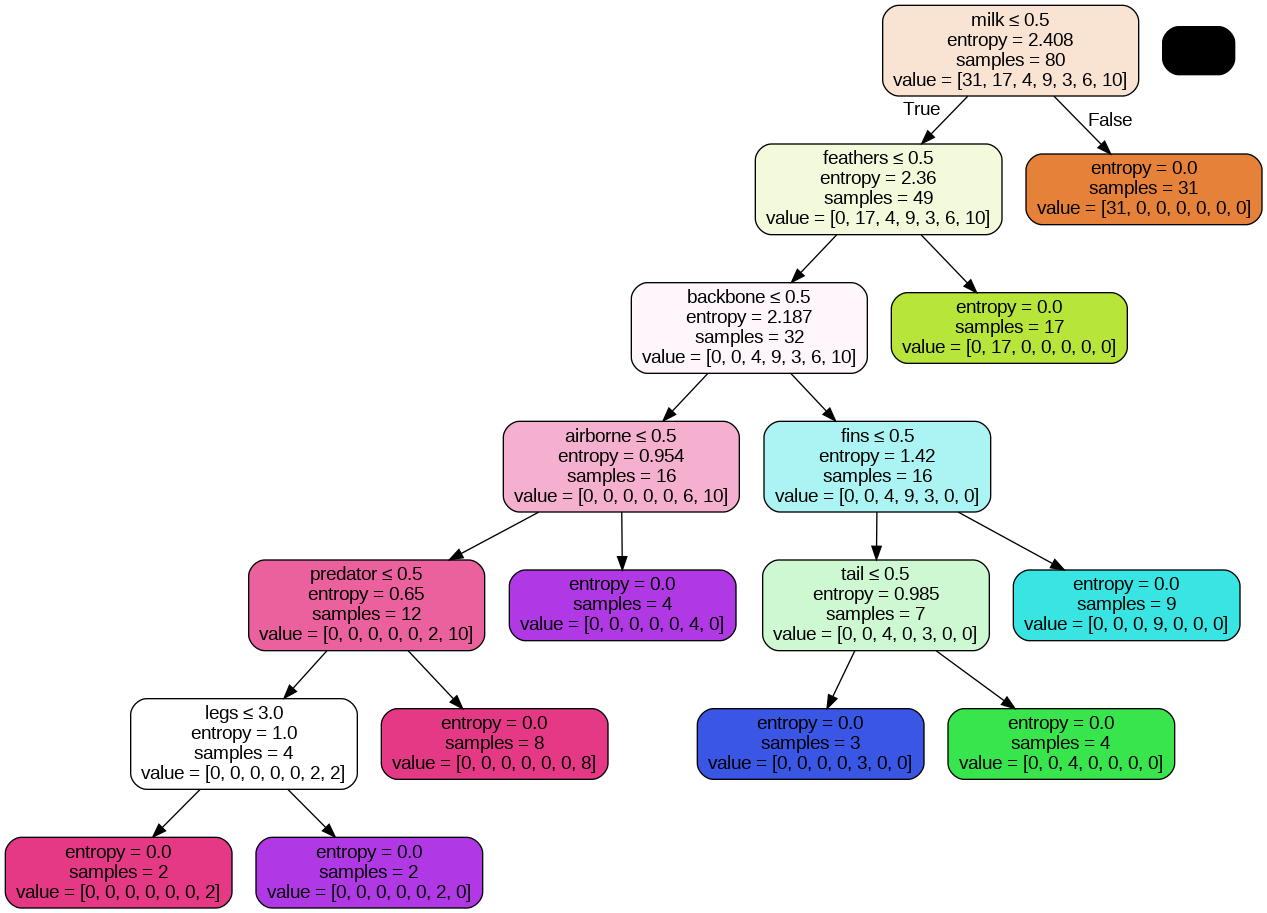

In [23]:
Image(graph.create_png())

In [27]:
#Use sklearn to make a classification report and a confusion matrix
print(classification_report(y_test, pred))

...
...

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ellipsis

In [26]:
#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))

[[10  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0  0  2]]


Text(42.0, 0.5, 'Truth')

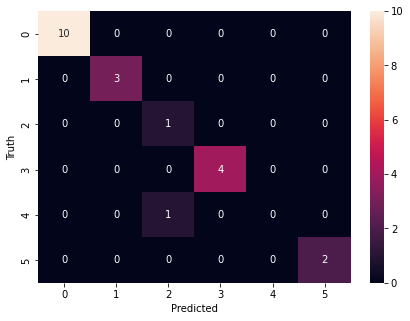

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
#Find the recall,f1-score for class type '3'
ans[3]={"recall":1,"f1-score":0.5}

In [30]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
import sklearn
import math
mae=np.mean(abs(y_test-pred))
mse=np.mean((y_test-pred)**2)
rmse=np.sqrt(np.mean(np.square(y_test-pred)))
...
...
...

Ellipsis

In [31]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4]=[mae,rmse]

In [32]:
print(ans)

[0.9685867165455516, 0.6599660577558698, 0.9523809523809523, {'recall': 1, 'f1-score': 0.5}, [0.09523809523809523, 0.4364357804719847]]


In [ ]:
ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit

'~' is not recognized as an internal or external command,
operable program or batch file.
